In [61]:
#Cell for import and functions
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

#indices for sensors
pinky = [5,58,14,54,56,11,9]
ring = [8,10,13,53,0,6,2]
middle = [29,1,21,17,3,19,26]
index = [22,18,23,16,24,28,36]
thumb = [44,34,43,38,45,37,39]
crit = [32,33,41,40,30,25]
flp = [62,12,7,31,47,20]

fingertips = pinky+ring+middle+index+thumb+flp

#labels
path_ft2t1 = '/home/julian/glove/haptic_exploration.multitarget/data/Fabian/labels_Trial2_t1_pol.csv'
path_ft5t5 = '/home/julian/glove/haptic_exploration.multitarget/data/Fabian/labels_Trial5_t5_pol.csv'
path_ft7t2 = '/home/julian/glove/haptic_exploration.multitarget/data/Fabian/labels_Trial7_t2_pol.csv'

#ros
ros_path_ft2t1 = '/home/julian/glove/haptic_exploration.multitarget/data/Fabian/Trial2_tac.csv'
ros_path_ft5t5 = '/home/julian/glove/haptic_exploration.multitarget/data/Fabian/Trial5_tac.csv'
ros_path_ft7t2 = '/home/julian/glove/haptic_exploration.multitarget/data/Fabian/Trial7_tac.csv'

def extract_target(labels):
    target = labels[0]
    extracted = []
    for i in labels:
        if i == target:
            extracted.append(i)
        else:
            break;
    return extracted

In [62]:
#load data - labels
labels_ft2t1 = pd.read_csv(path_ft2t1,header=None)
labels_ft5t5 = pd.read_csv(path_ft5t5, header=None)
labels_ft7t2 = pd.read_csv(path_ft7t2, header=None)

#load data - ros
ros_ft2t1 = pd.read_csv(ros_path_ft2t1, header=None, skiprows=1)
ros_ft5t5 = pd.read_csv(ros_path_ft5t5, header=None, skiprows=1)
ros_ft7t2 = pd.read_csv(ros_path_ft7t2, header=None, skiprows=1)

#extract_target
t1 = extract_target(labels_ft2t1[0])
t5 = extract_target(labels_ft5t5[0])
t2 = extract_target(labels_ft7t2[0])
t = np.append(t1,t5)
t = np.append(t,t2)


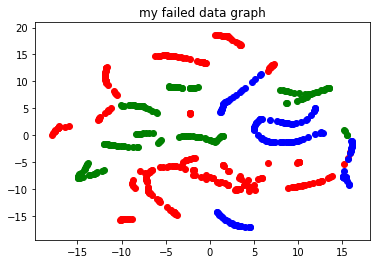

In [68]:
#visualize
X1 = normalize(ros_ft2t1.values[0:len(t1),1:])
X5 = normalize(ros_ft5t5.values[0:len(t5),1:])
X2 = normalize(ros_ft7t2.values[0:len(t2),1:])

X1 = X1[:,fingertips]
X5 = X5[:,fingertips]
X2 = X2[:,fingertips]

X = np.append(X1,X5,axis=0)
X = np.append(X,X2,axis=0)

#print(X)

model = TSNE(n_components=2,perplexity=15,learning_rate=300)
redX = model.fit_transform(X)

color=['','red','green','','','blue']
for idx,val in enumerate(t):
    plt.scatter(redX[idx,0],redX[idx,1],c=color[val])

plt.show()

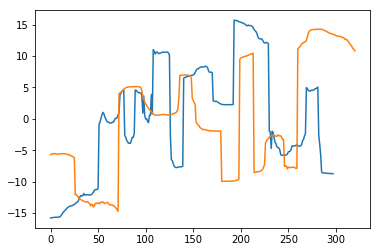

In [110]:
#print just one set
X1_2 = normalize(ros_ft2t1.values[1804:2125,1:])
X1_2 = X1_2[:,fingertips]

model = TSNE(n_components=1, perplexity=37, learning_rate=250)
tX1 = model.fit_transform(X1)
plt.plot(tX1)
model = TSNE(n_components=1, perplexity=50, learning_rate=250)
tX1_2 = model.fit_transform(X1_2)
plt.plot(tX1_2)
#tX2 = model.fit_transform(X2)
#plt.plot(tX2)
#tX5 = model.fit_transform(X5)
#plt.plot(tX5)
plt.show()

In [13]:
import numpy as np
a = [17., 5., 8., 8., 91.]
b = []

for i in a:
    b.append((round(i/np.sum(a),3)))
print(b)
print(np.sum(b))

[0.132, 0.039, 0.062, 0.062, 0.705]
1.0
